Total number of users (Tnu): 100
Total number of items (Tni): 50

Number of ratings for every product:
productId
P040    27
P029    27
P037    25
P034    25
P025    23
P017    22
P026    22
P045    21
P015    21
P024    21
P008    20
P011    20
P047    20
P033    20
P035    20
P023    19
P002    19
P030    19
P032    19
P049    19
P038    19
P012    18
P046    18
P009    18
P004    18
P003    18
P007    17
P022    17
P006    17
P018    17
P044    17
P005    17
P043    17
P020    16
P031    16
P036    16
P013    16
P042    15
P050    15
P010    15
P039    15
P014    15
P021    15
P001    15
P028    14
P019    14
P027    14
P041    13
P048    11
P016    10
Name: count, dtype: int64


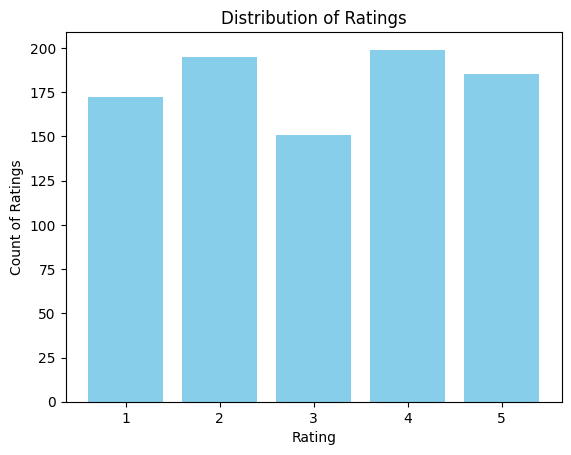


Matrix Sparsity: 81.96%
Bias Level: 0.31

Lowest-rated items (target items): P036, P003

Final Results:
Tnu: 100
Tni: 50
Ratings Per Product: {'P040': 27, 'P029': 27, 'P037': 25, 'P034': 25, 'P025': 23, 'P017': 22, 'P026': 22, 'P045': 21, 'P015': 21, 'P024': 21, 'P008': 20, 'P011': 20, 'P047': 20, 'P033': 20, 'P035': 20, 'P023': 19, 'P002': 19, 'P030': 19, 'P032': 19, 'P049': 19, 'P038': 19, 'P012': 18, 'P046': 18, 'P009': 18, 'P004': 18, 'P003': 18, 'P007': 17, 'P022': 17, 'P006': 17, 'P018': 17, 'P044': 17, 'P005': 17, 'P043': 17, 'P020': 16, 'P031': 16, 'P036': 16, 'P013': 16, 'P042': 15, 'P050': 15, 'P010': 15, 'P039': 15, 'P014': 15, 'P021': 15, 'P001': 15, 'P028': 14, 'P019': 14, 'P027': 14, 'P041': 13, 'P048': 11, 'P016': 10}
Sparsity: 0.8196
Bias Level: 0.31240210245800826
Target Items: ('P036', 'P003')

Results saved successfully.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:\\Users\\DELL 5540\\Desktop\\Ass3\\electronics_ratings.csv'  # Replace with your actual file path
dataset = pd.read_csv(file_path)

# 1. Adjust the ratings to a 1-to-5 scale
min_rating = dataset['rating'].min()
max_rating = dataset['rating'].max()

# Normalize if necessary
if min_rating < 1 or max_rating > 5:
    dataset['rating'] = ((dataset['rating'] - min_rating) / (max_rating - min_rating)) * 4 + 1
    dataset['rating'] = dataset['rating'].round().astype(int)

# 2. Count the total number of users and items
Tnu = dataset['userId'].nunique()
Tni = dataset['productId'].nunique()

# Print total users and items
print(f"Total number of users (Tnu): {Tnu}")
print(f"Total number of items (Tni): {Tni}")

# 3. Count the number of ratings for every product
ratings_per_product = dataset['productId'].value_counts()
print("\nNumber of ratings for every product:")
print(ratings_per_product)

# 4. Draw the distribution of ratings
rating_distribution = dataset['rating'].value_counts().sort_index()

plt.bar(rating_distribution.index, rating_distribution.values, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Count of Ratings')
plt.title('Distribution of Ratings')
plt.show()

# Determine if the matrix is sparse
total_possible_ratings = Tnu * Tni
total_actual_ratings = len(dataset)
sparsity = 1 - (total_actual_ratings / total_possible_ratings)
print(f"\nMatrix Sparsity: {sparsity:.2%}")

# Determine if there's bias
mean_rating_per_product = dataset.groupby('productId')['rating'].mean()
bias = mean_rating_per_product.std()
print(f"Bias Level: {bias:.2f}")

# 5. Select the two lowest-rated items
lowest_rated_items = mean_rating_per_product.nsmallest(2).index.tolist()
target_item_11, target_item_12 = lowest_rated_items
print(f"\nLowest-rated items (target items): {target_item_11}, {target_item_12}")

# Save results for later use
results = {
    'Tnu': Tnu,
    'Tni': Tni,
    'Ratings Per Product': ratings_per_product.to_dict(),
    'Sparsity': sparsity,
    'Bias Level': bias,
    'Target Items': (target_item_11, target_item_12)
}

# Print results
print("\nFinal Results:")
for key, value in results.items():
    print(f"{key}: {value}")

# Save results to a JSON file
import json
with open('assignment_results.json', 'w') as f:
    json.dump(results, f)

print("\nResults saved successfully.")

In [6]:
import numpy as np
import pandas as pd

# 3.2.1. Calculate the average rating for each of the target items (I1 and I2)
target_item_11 = 'P036'  # Replace 'I1' with actual target item ID
target_item_12 = 'P003'  # Replace 'I2' with actual target item ID

avg_rating_I1 = dataset[dataset['productId'] == target_item_11]['rating'].mean()
avg_rating_I2 = dataset[dataset['productId'] == target_item_12]['rating'].mean()

print(f"Average rating for {target_item_11}: {avg_rating_I1}")
print(f"Average rating for {target_item_12}: {avg_rating_I2}")

# 3.2.2. Use the mean-filling method to replace unspecified ratings
rating_matrix = dataset.pivot(index='userId', columns='productId', values='rating')
rating_matrix_filled = rating_matrix.copy()

rating_matrix_filled[target_item_11].fillna(avg_rating_I1, inplace=True)
rating_matrix_filled[target_item_12].fillna(avg_rating_I2, inplace=True)

print("Mean-filling applied for target items.")

# 3.2.3. Calculate the average rating for each item
item_mean_ratings = rating_matrix.mean()
print("\nAverage rating for each item:")
print(item_mean_ratings)

# 3.2.4. Calculate the difference between ratings and mean ratings for each item
rating_diff_matrix = rating_matrix.sub(item_mean_ratings, axis=1)
print("\nDifference matrix between ratings and mean ratings:")
print(rating_diff_matrix)

# 3.2.5. Compute the covariance for each two items
cov_matrix = rating_diff_matrix.cov()
print("\nCovariance matrix:")
print(cov_matrix)

# 3.2.6. Generate the covariance matrix
# (Already computed as 'cov_matrix' above)

# 3.2.7. Determine top 5-peers and top 10-peers
def get_top_peers(item_id, n_peers, cov_matrix):
    correlations = cov_matrix[item_id].dropna().sort_values(ascending=False)
    return correlations.index[1:n_peers + 1].tolist()  # Exclude the item itself

top_5_peers_I1 = get_top_peers(target_item_11, 5, cov_matrix)
top_10_peers_I1 = get_top_peers(target_item_11, 10, cov_matrix)
top_5_peers_I2 = get_top_peers(target_item_12, 5, cov_matrix)
top_10_peers_I2 = get_top_peers(target_item_12, 10, cov_matrix)

print(f"\nTop 5 peers for {target_item_11}: {top_5_peers_I1}")
print(f"Top 10 peers for {target_item_11}: {top_10_peers_I1}")
print(f"Top 5 peers for {target_item_12}: {top_5_peers_I2}")
print(f"Top 10 peers for {target_item_12}: {top_10_peers_I2}")

# 3.2.8. Determine reduced dimensional space for each user using top 5-peers
reduced_matrix_5_I1 = rating_matrix_filled[top_5_peers_I1]
reduced_matrix_5_I2 = rating_matrix_filled[top_5_peers_I2]

# 3.2.9. Compute the rating predictions for missing ratings (top 5-peers)
predictions_5_I1 = reduced_matrix_5_I1.mean(axis=1)
predictions_5_I2 = reduced_matrix_5_I2.mean(axis=1)

print(f"\nRating predictions for {target_item_11} using top 5 peers:")
print(predictions_5_I1)
print(f"Rating predictions for {target_item_12} using top 5 peers:")
print(predictions_5_I2)

# 3.2.10. Determine reduced dimensional space for each user using top 10-peers
reduced_matrix_10_I1 = rating_matrix_filled[top_10_peers_I1]
reduced_matrix_10_I2 = rating_matrix_filled[top_10_peers_I2]

# 3.2.11. Compute the rating predictions for missing ratings (top 10-peers)
predictions_10_I1 = reduced_matrix_10_I1.mean(axis=1)
predictions_10_I2 = reduced_matrix_10_I2.mean(axis=1)

print(f"\nRating predictions for {target_item_11} using top 10 peers:")
print(predictions_10_I1)
print(f"Rating predictions for {target_item_12} using top 10 peers:")
print(predictions_10_I2)

# 3.2.12. Compare the results of 3.2.9 with 3.2.11
comparison_I1 = pd.DataFrame({'Top 5 Peers': predictions_5_I1, 'Top 10 Peers': predictions_10_I1})
comparison_I2 = pd.DataFrame({'Top 5 Peers': predictions_5_I2, 'Top 10 Peers': predictions_10_I2})

print(f"\nComparison of predictions for {target_item_11}:")
print(comparison_I1)
print(f"\nComparison of predictions for {target_item_12}:")
print(comparison_I2)


Average rating for P036: 2.1875
Average rating for P003: 2.5
Mean-filling applied for target items.

Average rating for each item:
productId
P001    3.000000
P002    2.631579
P003    2.500000
P004    3.444444
P005    3.411765
P006    3.470588
P007    3.352941
P008    3.050000
P009    3.166667
P010    2.733333
P011    3.050000
P012    2.722222
P013    2.750000
P014    3.200000
P015    3.476190
P016    2.500000
P017    2.818182
P018    2.529412
P019    2.857143
P020    2.875000
P021    3.333333
P022    2.705882
P023    3.315789
P024    2.952381
P025    3.434783
P026    3.227273
P027    3.000000
P028    2.857143
P029    3.370370
P030    2.947368
P031    2.875000
P032    3.052632
P033    3.000000
P034    3.440000
P035    2.950000
P036    2.187500
P037    3.200000
P038    2.894737
P039    3.466667
P040    3.111111
P041    2.769231
P042    2.866667
P043    2.647059
P044    3.235294
P045    2.714286
P046    3.166667
P047    3.100000
P048    2.545455
P049    3.210526
P050    3.400000
dtype: fl

In [7]:
import numpy as np
import pandas as pd

# 3.3.1. Generate the covariance matrix using Maximum Likelihood Estimation (MLE)
def mle_covariance_matrix(rating_matrix):
    items = rating_matrix.columns
    cov_matrix = pd.DataFrame(0, index=items, columns=items, dtype=float)

    for item_i in items:
        for item_j in items:
            common_users = rating_matrix[[item_i, item_j]].dropna()
            if len(common_users) > 0:
                cov = np.cov(common_users[item_i], common_users[item_j])[0, 1]
            else:
                cov = 0
            cov_matrix.loc[item_i, item_j] = cov
    return cov_matrix

mle_cov_matrix = mle_covariance_matrix(rating_matrix)
print("\nMLE Covariance Matrix:")
print(mle_cov_matrix)

# 3.3.2. Determine the top 5-peers and top 10-peers
def get_top_peers_mle(item_id, n_peers, cov_matrix):
    correlations = cov_matrix[item_id].dropna().sort_values(ascending=False)
    return correlations.index[1:n_peers + 1].tolist()  # Exclude the item itself

top_5_peers_mle_I1 = get_top_peers_mle(target_item_11, 5, mle_cov_matrix)
top_10_peers_mle_I1 = get_top_peers_mle(target_item_11, 10, mle_cov_matrix)
top_5_peers_mle_I2 = get_top_peers_mle(target_item_12, 5, mle_cov_matrix)
top_10_peers_mle_I2 = get_top_peers_mle(target_item_12, 10, mle_cov_matrix)

print(f"\nTop 5 peers (MLE) for {target_item_11}: {top_5_peers_mle_I1}")
print(f"Top 10 peers (MLE) for {target_item_11}: {top_10_peers_mle_I1}")
print(f"Top 5 peers (MLE) for {target_item_12}: {top_5_peers_mle_I2}")
print(f"Top 10 peers (MLE) for {target_item_12}: {top_10_peers_mle_I2}")

# 3.3.3. Determine reduced dimensional space for each user using top 5-peers
reduced_matrix_mle_5_I1 = rating_matrix_filled[top_5_peers_mle_I1]
reduced_matrix_mle_5_I2 = rating_matrix_filled[top_5_peers_mle_I2]

# 3.3.4. Compute rating predictions for missing ratings (top 5-peers)
predictions_mle_5_I1 = reduced_matrix_mle_5_I1.mean(axis=1)
predictions_mle_5_I2 = reduced_matrix_mle_5_I2.mean(axis=1)

print(f"\nRating predictions (MLE) for {target_item_11} using top 5 peers:")
print(predictions_mle_5_I1)
print(f"Rating predictions (MLE) for {target_item_12} using top 5 peers:")
print(predictions_mle_5_I2)

# 3.3.5. Determine reduced dimensional space for each user using top 10-peers
reduced_matrix_mle_10_I1 = rating_matrix_filled[top_10_peers_mle_I1]
reduced_matrix_mle_10_I2 = rating_matrix_filled[top_10_peers_mle_I2]

# 3.3.6. Compute rating predictions for missing ratings (top 10-peers)
predictions_mle_10_I1 = reduced_matrix_mle_10_I1.mean(axis=1)
predictions_mle_10_I2 = reduced_matrix_mle_10_I2.mean(axis=1)

print(f"\nRating predictions (MLE) for {target_item_11} using top 10 peers:")
print(predictions_mle_10_I1)
print(f"Rating predictions (MLE) for {target_item_12} using top 10 peers:")
print(predictions_mle_10_I2)

# 3.3.7. Compare results of 3.3.3 with 3.3.6
comparison_mle_I1 = pd.DataFrame({'Top 5 Peers (MLE)': predictions_mle_5_I1, 'Top 10 Peers (MLE)': predictions_mle_10_I1})
comparison_mle_I2 = pd.DataFrame({'Top 5 Peers (MLE)': predictions_mle_5_I2, 'Top 10 Peers (MLE)': predictions_mle_10_I2})

print(f"\nComparison of MLE predictions for {target_item_11}:")
print(comparison_mle_I1)
print(f"\nComparison of MLE predictions for {target_item_12}:")
print(comparison_mle_I2)

# 3.3.8. Compare results of 3.2.9 with 3.3.4
comparison_part2_vs_part1_I1 = pd.DataFrame({'Part 1 Top 5 Peers': predictions_5_I1, 'Part 2 Top 5 Peers (MLE)': predictions_mle_5_I1})
comparison_part2_vs_part1_I2 = pd.DataFrame({'Part 1 Top 5 Peers': predictions_5_I2, 'Part 2 Top 5 Peers (MLE)': predictions_mle_5_I2})

print(f"\nComparison of Part 1 and Part 2 (Top 5 Peers) predictions for {target_item_11}:")
print(comparison_part2_vs_part1_I1)
print(f"\nComparison of Part 1 and Part 2 (Top 5 Peers) predictions for {target_item_12}:")
print(comparison_part2_vs_part1_I2)

# 3.3.9. Compare results of 3.2.11 with 3.3.6
comparison_part2_vs_part1_I1_10 = pd.DataFrame({'Part 1 Top 10 Peers': predictions_10_I1, 'Part 2 Top 10 Peers (MLE)': predictions_mle_10_I1})
comparison_part2_vs_part1_I2_10 = pd.DataFrame({'Part 1 Top 10 Peers': predictions_10_I2, 'Part 2 Top 10 Peers (MLE)': predictions_mle_10_I2})

print(f"\nComparison of Part 1 and Part 2 (Top 10 Peers) predictions for {target_item_11}:")
print(comparison_part2_vs_part1_I1_10)
print(f"\nComparison of Part 1 and Part 2 (Top 10 Peers) predictions for {target_item_12}:")
print(comparison_part2_vs_part1_I2_10)


C:\Users\DELL 5540\AppData\Local\Temp\ipykernel_17064\1570932943.py:13: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov = np.cov(common_users[item_i], common_users[item_j])[0, 1]
C:\Users\DELL 5540\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\DELL 5540\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\DELL 5540\AppData\Local\Temp\ipykernel_17064\1570932943.py:13: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov = np.cov(common_users[item_i], common_users[item_j])[0, 1]
C:\Users\DELL 5540\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\DELL 5540\AppData\Roaming\Python\Python311\site-packages\numpy\lib\


MLE Covariance Matrix:
productId      P001      P002      P003      P004      P005      P006  \
productId                                                               
P001       0.000000  1.583333  0.000000 -3.000000  0.000000  0.850000   
P002       1.583333  0.000000  2.333333 -0.500000  0.000000 -1.666667   
P003       0.000000  2.333333  0.000000  0.166667  0.416667 -1.750000   
P004      -3.000000 -0.500000  0.166667  0.000000  1.200000 -1.333333   
P005       0.000000  0.000000  0.416667  1.200000  0.000000       NaN   
P006       0.850000 -1.666667 -1.750000 -1.333333       NaN  0.000000   
P007      -1.333333  8.000000       NaN  1.000000 -0.400000  0.000000   
P008      -2.333333  1.000000 -3.000000  0.000000  0.083333  2.000000   
P009      -0.333333 -1.000000 -0.166667 -0.500000 -0.050000  6.000000   
P010            NaN -1.500000  0.000000  0.000000 -0.500000 -3.000000   
P011            NaN       NaN  3.000000  0.416667 -0.500000  0.300000   
P012      -2.000000  0.0000

C:\Users\DELL 5540\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\DELL 5540\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\DELL 5540\AppData\Local\Temp\ipykernel_17064\1570932943.py:13: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov = np.cov(common_users[item_i], common_users[item_j])[0, 1]
C:\Users\DELL 5540\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\DELL 5540\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [15]:
import numpy as np
from numpy.linalg import eig, norm

# Assume 'ratings_matrix' is the input matrix from Assignment 1
ratings_matrix = np.array([
    [5, 0, 2, 3, 3],
    [3, 2, 0, 0, 0],
    [4, 3, 5, 3, 5],
    [2, 0, 1, 0, 4],
    [5, 3, 0, 3, 4]
])

# 3.4.1. Calculate the average rating for each item
average_ratings = np.nanmean(np.where(ratings_matrix == 0, np.nan, ratings_matrix), axis=0)
print("Average ratings for each item:", average_ratings)

# 3.4.2. Use the mean-filling method to replace unspecified ratings
ratings_matrix_filled = np.where(ratings_matrix == 0, average_ratings, ratings_matrix)
print("\nRatings matrix after mean-filling:")
print(ratings_matrix_filled)

# 3.4.3. Compute eigenvalues and eigenvectors of the ratings matrix
cov_matrix = np.cov(ratings_matrix_filled.T)  # Covariance matrix (transposed for items)
eigenvalues, eigenvectors = eig(cov_matrix)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

# 3.4.4. Check orthogonality of eigenvectors
def check_orthogonality(vectors):
    n = vectors.shape[1]
    for i in range(n):
        for j in range(i + 1, n):
            dot_product = np.dot(vectors[:, i], vectors[:, j])
            if not np.isclose(dot_product, 0):
                return False
    return True

is_orthogonal = check_orthogonality(eigenvectors)
print("\nAre the eigenvectors orthogonal?", is_orthogonal)

# 3.4.5. Perform vector normalization if not orthogonal
if not is_orthogonal:
    print("\nPerforming vector normalization...")
    norms = np.linalg.norm(eigenvectors, axis=0)
    eigenvectors = eigenvectors / norms
    print("Normalized eigenvectors:")
    print(eigenvectors)

# 3.4.6. Re-check orthonormality
is_orthogonal = check_orthogonality(eigenvectors)
print("\nRe-check orthogonality after normalization:", is_orthogonal)

# 3.4.7. Apply Gram-Schmidt method to convert eigenvectors into orthonormal vectors

# 3.4.7.1. Assuming the first orthonormal vector equals the eigenvector corresponding to the highest eigenvalue
v1 = eigenvectors[:, np.argmax(eigenvalues)]  # Eigenvector corresponding to the largest eigenvalue
e1 = v1

# 3.4.7.2. Normalizing the first orthonormal vector
e1 = e1 / norm(e1)
print("\nFirst orthonormal vector (e1):", e1)

# 3.4.7.3. Assign the highest eigenvalue to the first new eigenvalue
sigma1 = eigenvalues[np.argmax(eigenvalues)]
print("\nHighest eigenvalue (σ1):", sigma1)

# 3.4.7.4. Calculate the new predicted vector û1
A = ratings_matrix_filled
u1 = np.dot(A, e1) / sigma1
print("\nPredicted vector û1:", u1)

# 3.4.7.5. Calculate the projection of the vector û1 on the second eigenvector v2
v2 = eigenvectors[:, np.argsort(eigenvalues)[-2]]  # Second largest eigenvalue's eigenvector
proj_u1_v2 = np.dot(u1[:5], v2) * v2  # Use only the first 4 elements of û1 to match v2
print("\nProjection of û1 on v2:", proj_u1_v2)

# 3.4.7.6. Constructing the new orthonormal vector for v2
u2 = v2 - proj_u1_v2
print("\nNew orthonormal vector (before normalization):", u2)

# 3.4.7.7. Normalizing the new orthonormal vector e2
e2 = u2 / norm(u2)
print("\nSecond orthonormal vector (e2):", e2)

# 3.4.7.8. Calculating the new eigenvalue σ2
sigma2 = np.sqrt(np.dot(A.T @ A @ e2, e2))
print("\nSecond new eigenvalue (σ2):", sigma2)

# 3.4.7.9. Calculating the new predicted vector û2
u2 = np.dot(A, e2) / sigma2
print("\nNew predicted vector û2:", u2)

# 3.4.8. Construct the predicted waiting matrix Σ (Sigma)
Sigma = np.diag([sigma1, sigma2])
print("\nPredicted waiting matrix Σ:")
print(Sigma)

# 3.4.9. Construct the item matrix V̂ with orthonormal vectors as columns
V_hat = np.column_stack([e1, e2])
print("\nItem matrix V̂ (orthonormal vectors as columns):")
print(V_hat)

# 3.4.10. Construct the user matrix Ũ with the predicted vectors
U_hat = np.column_stack([u1, u2])
print("\nUser matrix Ũ (predicted user vectors):")
print(U_hat)

# 3.4.11. Construct the reduced rating matrix R̂ = ŨΣV̂^T
R_hat = np.dot(U_hat, np.dot(Sigma, V_hat.T))
print("\nReduced rating matrix R̂:")
print(R_hat)

# 3.4.12. Use the reduced rating matrix to find missing ratings for target items (I1 and I2)
# Assuming I1 and I2 correspond to the missing values in the original matrix
missing_ratings_indices = np.argwhere(ratings_matrix == 0)
print("\nMissing ratings (I1 and I2) in the original matrix, predicted by the reduced matrix:")
for idx in missing_ratings_indices:
    predicted_rating = R_hat[idx[0], idx[1]]
    print(f"Predicted rating for user {idx[0]} on item {idx[1]}: {predicted_rating}")


Average ratings for each item: [3.8        2.66666667 2.66666667 3.         4.        ]

Ratings matrix after mean-filling:
[[5.         2.66666667 2.         3.         3.        ]
 [3.         2.         2.66666667 3.         4.        ]
 [4.         3.         5.         3.         5.        ]
 [2.         2.66666667 1.         3.         4.        ]
 [5.         3.         2.66666667 3.         4.        ]]

Eigenvalues:
[2.7851271  1.55882235 0.02112548 0.1682584  0.        ]

Eigenvectors:
[[-0.488043   -0.81441181 -0.30708069  0.06518348  0.        ]
 [-0.11578809 -0.06855384  0.54192826  0.82958258  0.        ]
 [-0.8353352   0.36528896  0.2990078  -0.28173288  0.        ]
 [ 0.          0.          0.          0.          1.        ]
 [-0.2249939   0.44564308 -0.72291738  0.47767191  0.        ]]

Are the eigenvectors orthogonal? True

Re-check orthogonality after normalization: True

First orthonormal vector (e1): [-0.488043   -0.11578809 -0.8353352   0.         -0.2249939 ]
